# Implementation of clustering algorithms

Build K-Means and Agglomerative Clustering models to perform an unsupervised clustering by using given data. Follow below steps as a guideline for building your model and explain each of them in code lines. 

* Data cleaning 

Start with data cleaning to ensure that your data is correct, consistent and usable. The techniques used for data cleaning may vary but you can consider to follow these basic steps: handling missing values, encoding categorical features, extracting useful features by using existing features, handling outliers etc.

* Data Preprocessing

In this step you should transform raw data into an understandable format for machine learning algorithms. This step may include scaling the features, performing dimensionality reduction etc.

* Clustering 

The goal of this step is to find distinct groups or “clusters” within a data set by using K-Means and Agglomerative Clustering Algorithms. Apply Elbow Method to determine the number of clusters. After building models, examine and comment the clusters formed via scatter plot.

* Silhouette Scores 

To evaluate how “well clustered” data points are, use the “silhouette score” and plot the Silhouette Scores for all of data points.

Note: Don't forget to explain your codes and comment on the obtained result.

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer,KElbowVisualizer
from scipy.cluster import hierarchy
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data into a pandas DataFrame
df = pd.read_csv("dataset.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# Check for missing values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

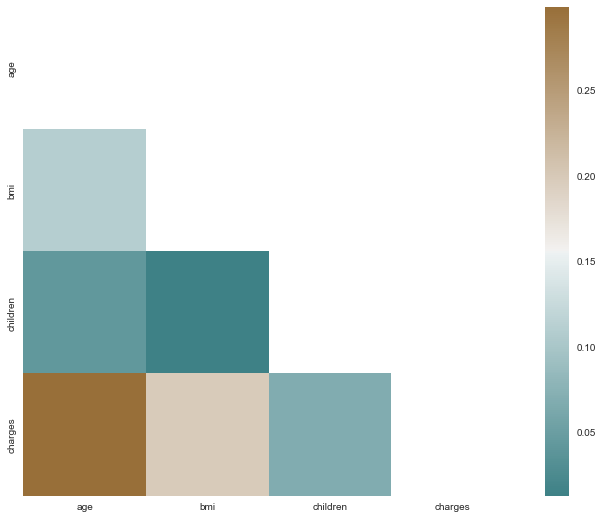

In [4]:
#Generating heatmap for data 
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(200, 50, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap)
plt.show()

In [5]:
# Convert non-numeric columns to numeric
le = LabelEncoder()
df["sex"] = le.fit_transform(df["sex"])
df["smoker"] = le.fit_transform(df["smoker"])
df["region"] = le.fit_transform(df["region"])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [6]:
#Normalizing the dataset by using StandardScaler()
df_columns = df.columns
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df,columns = df_columns)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.321227,0.0,1.0,1.000000,0.251611
1,0.000000,1.0,0.479150,0.2,0.0,0.666667,0.009636
2,0.217391,1.0,0.458434,0.6,0.0,0.666667,0.053115
3,0.326087,1.0,0.181464,0.0,0.0,0.333333,0.333010
4,0.304348,1.0,0.347592,0.0,0.0,0.333333,0.043816


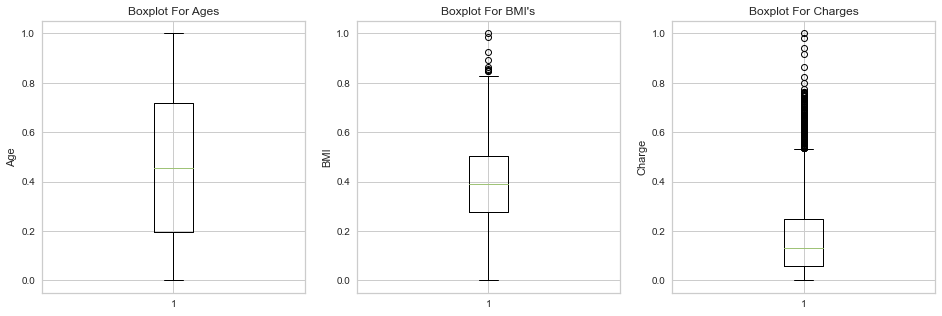

In [7]:
#Plotting boxplot for visualize outliers
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,5))
ax1.boxplot(df["age"])
ax1.set_title("Boxplot For Ages")
ax1.set_ylabel("Age")
ax2.boxplot(df["bmi"])
ax2.set_title("Boxplot For BMI's")
ax2.set_ylabel("BMI")
ax3.boxplot(df["charges"])
ax3.set_title("Boxplot For Charges")
ax3.set_ylabel("Charge")
plt.show()

In [8]:
def remove_outliers(df, column):
    # Calculate first and third quartiles
    q1, q3 = df[column].quantile([0.25, 0.75])
    # Calculate interquartile range
    iqr = q3 - q1
    # Calculate lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    # Identify rows with values outside the bounds
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    # Drop these rows from the DataFrame
    return df.drop(outliers.index)

# Remove outliers from the "age", "bmi", and "charges" columns
df = remove_outliers(df,"age")
df = remove_outliers(df,"bmi")                   
df = remove_outliers(df,"charges")

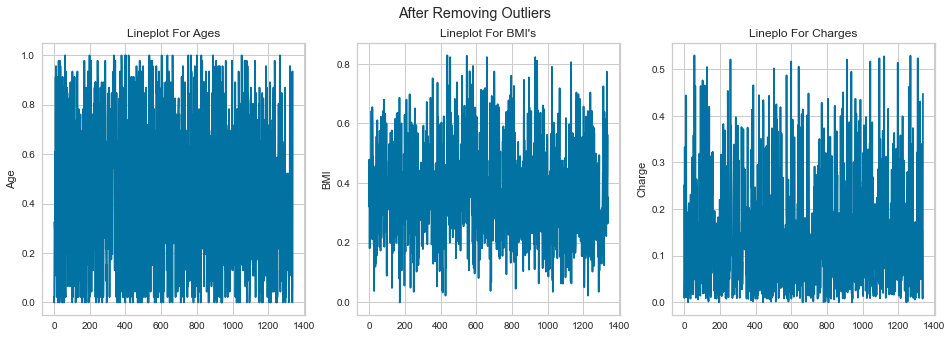

In [9]:
#Drawing lineplots after remove outliers
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,5))
fig.suptitle("After Removing Outliers")
ax1.plot(df["age"])
ax1.set_title("Lineplot For Ages")
ax1.set_ylabel("Age")
ax2.plot(df["bmi"])
ax2.set_title("Lineplot For BMI's")
ax2.set_ylabel("BMI")
ax3.plot(df["charges"])
ax3.set_title("Lineplo For Charges")
ax3.set_ylabel("Charge")
plt.show()

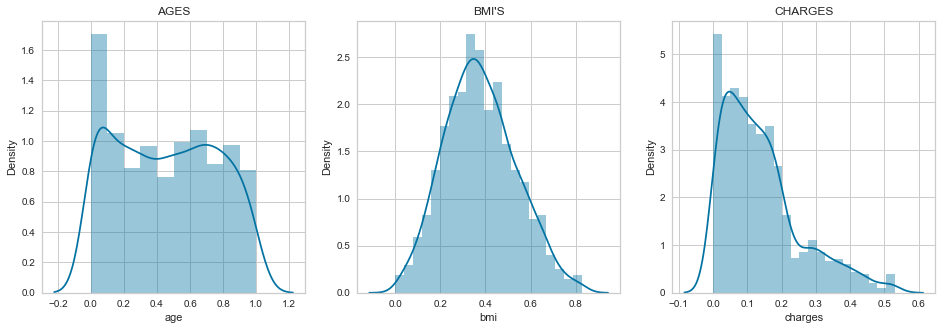

In [10]:
#Drawing histplots
fig, ax = plt.subplots(1,3,figsize=(16,5))
sns.distplot(df["age"], ax=ax[0]).set(title="AGES")
sns.distplot(df["bmi"], ax=ax[1]).set(title="BMI'S")
sns.distplot(df["charges"], ax=ax[2]).set(title="CHARGES")
plt.show()

In [11]:
###KMeans Clustering Model###

In [12]:
#KMeans Modelling
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(df)

KMeans(n_clusters=3, random_state=0)

In [13]:
kmeans.labels_

array([2, 1, 1, ..., 0, 0, 2])

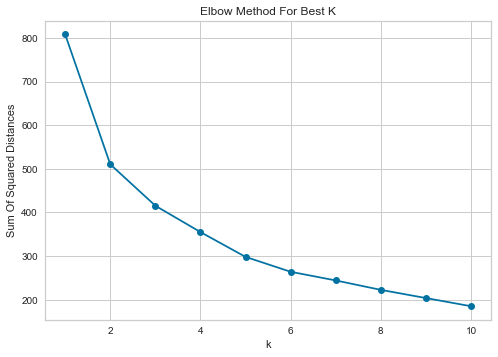

In [14]:
#Plotting Elbow Plot for determine best K for KMeans
sumOfSquaredDistances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    sumOfSquaredDistances.append(km.inertia_)
plt.plot(K,sumOfSquaredDistances,marker = "o")
plt.xlabel("k")
plt.ylabel("Sum Of Squared Distances")
plt.title("Elbow Method For Best K")
plt.show()

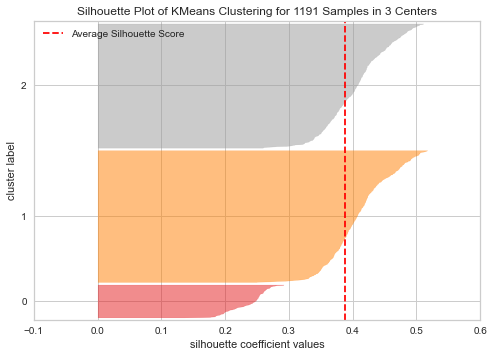

In [15]:
#Plotting Silhouette Plot for KMeans
km = KMeans(n_clusters = 3)
visualizer = SilhouetteVisualizer(km)
visualizer.fit(df)
visualizer.poof()
plt.show()

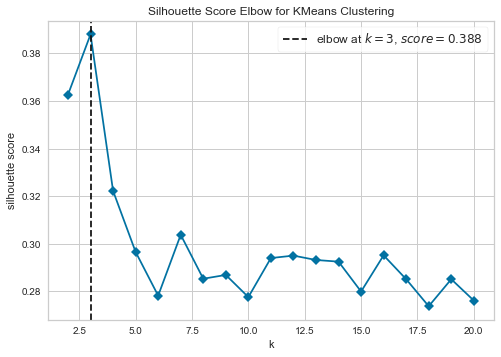

In [16]:
#Plotting Silhouette Score Plot for KMeans
km = KMeans(n_clusters=3)
visualizer = KElbowVisualizer(km, k=(2,21),metric ='silhouette', timings=False)
visualizer.fit(df)
visualizer.poof()
plt.show()

In [17]:
km = KMeans(n_clusters = 3)
km.fit(df)
cluster_label = km.labels_
df['KMEANS_LABELS'] = cluster_label
df.head()

,age,sex,bmi,children,smoker,region,charges,KMEANS_LABELS
0,0.021739,0.0,0.321227,0.0,1.0,1.000000,0.251611,1
1,0.000000,1.0,0.479150,0.2,0.0,0.666667,0.009636,0
2,0.217391,1.0,0.458434,0.6,0.0,0.666667,0.053115,0
3,0.326087,1.0,0.181464,0.0,0.0,0.333333,0.333010,0
4,0.304348,1.0,0.347592,0.0,0.0,0.333333,0.043816,0


In [18]:
#Silhouette scores for different k values (2-20) for KMeans
for n_clusters in range(2,21):
    km = KMeans (n_clusters=n_clusters)
    preds = km.fit_predict(df)
    centers = km.cluster_centers_
    score = silhouette_score(df, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5784574808282024
For n_clusters = 3, silhouette score is 0.5542953273305613
For n_clusters = 4, silhouette score is 0.43275006996031873
For n_clusters = 5, silhouette score is 0.31806605583993786
For n_clusters = 6, silhouette score is 0.32435461984079894
For n_clusters = 7, silhouette score is 0.3076662605038268
For n_clusters = 8, silhouette score is 0.2908069935551105
For n_clusters = 9, silhouette score is 0.291093843463563
For n_clusters = 10, silhouette score is 0.29413327312698595
For n_clusters = 11, silhouette score is 0.29902597111860213
For n_clusters = 12, silhouette score is 0.2906557574142037
For n_clusters = 13, silhouette score is 0.30405288822054255
For n_clusters = 14, silhouette score is 0.30756185459878543
For n_clusters = 15, silhouette score is 0.2961428627305162
For n_clusters = 16, silhouette score is 0.29426213428437764
For n_clusters = 17, silhouette score is 0.27994320454252797
For n_clusters = 18, silhouette score is

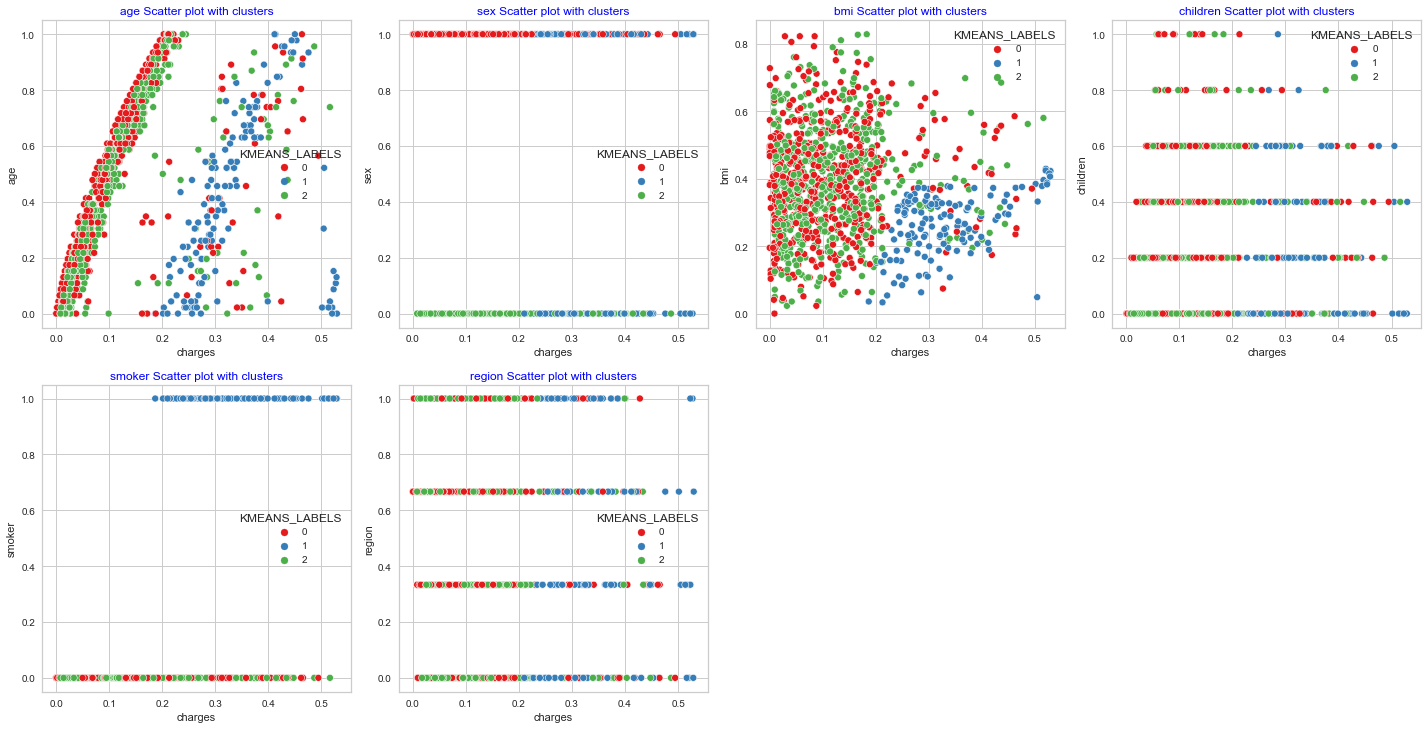

In [19]:
f=plt.figure(figsize=(20,20))
scatter_cols =["age","sex","bmi","children","smoker","region"]
for i, col in enumerate(scatter_cols):
    ax=f.add_subplot(4,4,i+1)
    sns.scatterplot(x=df['charges'],y=df[col],hue=df['KMEANS_LABELS'],palette='Set1')
    ax.set_title(col+" Scatter plot with clusters",color='blue')
    plt.ylabel(col)
f.tight_layout()

In [20]:
###Agglomerative Clustering Model###

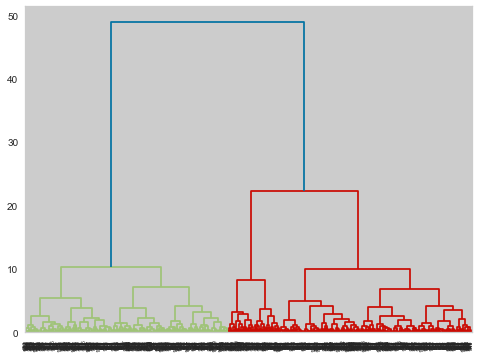

In [27]:
clusters = hierarchy.linkage(df, method="ward")
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)

In [22]:
clustering_model = AgglomerativeClustering(n_clusters=6, linkage="ward")
clustering_model.fit(df)
labels = clustering_model.labels_
labels

array([5, 4, 4, ..., 1, 1, 5], dtype=int64)

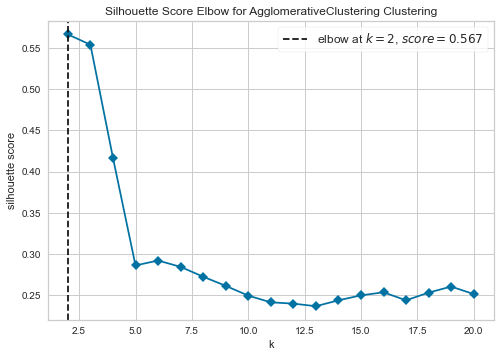

In [23]:
agg_model = AgglomerativeClustering(n_clusters = 3)

# Create the KElbowVisualizer with the AgglomerativeClustering model
visualizer = KElbowVisualizer(agg_model, k=(2,21), metric='silhouette', timings=False)

# Fit the data to the visualizer
visualizer.fit(df)

# Draw/show/poof the data
visualizer.poof()
plt.show()

In [24]:
#Silhouette scores for different k values (2-20) for Agglomerative Clustering
for n_clusters in range(2,21):    
    clustering_model = AgglomerativeClustering(n_clusters=n_clusters)
    clustering_model.fit(df)
    labels = clustering_model.labels_
    silhouette = sklearn.metrics.silhouette_score(df, labels)
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, silhouette))

For n_clusters = 2, silhouette score is 0.5668156513467442
For n_clusters = 3, silhouette score is 0.5542953273305613
For n_clusters = 4, silhouette score is 0.41675321707538215
For n_clusters = 5, silhouette score is 0.28576347797404067
For n_clusters = 6, silhouette score is 0.291745991328768
For n_clusters = 7, silhouette score is 0.2840303419550153
For n_clusters = 8, silhouette score is 0.2720852062712676
For n_clusters = 9, silhouette score is 0.26095742718875725
For n_clusters = 10, silhouette score is 0.2490737718739905
For n_clusters = 11, silhouette score is 0.24088154420449853
For n_clusters = 12, silhouette score is 0.23932391977103112
For n_clusters = 13, silhouette score is 0.23616568349440276
For n_clusters = 14, silhouette score is 0.24333888678008225
For n_clusters = 15, silhouette score is 0.24936601622803264
For n_clusters = 16, silhouette score is 0.25307782060056777
For n_clusters = 17, silhouette score is 0.24335072348746647
For n_clusters = 18, silhouette score i